In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mcdonalds.csv")

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Data exploration

In [4]:
print("Column Names:")
print(data.columns)


Column Names:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
print("\nDataset Dimensions:")
print(data.shape)


Dataset Dimensions:
(1453, 15)


# Descriptive analysis

In [6]:
# Data Summary
print("\nData Summary:")
print(data.describe())
data.describe(include="all")


Data Summary:
               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [7]:
data["Like"].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [8]:
data["healthy"].value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

# Data cleaning

In [9]:
# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)  

In [10]:
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


# Exploratory Data Analysis (EDA)

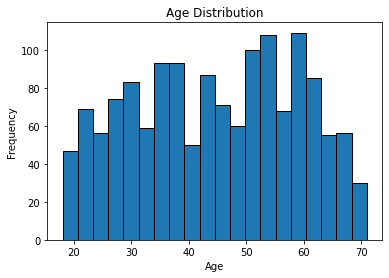

In [11]:
# Creating a histogram for Age
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



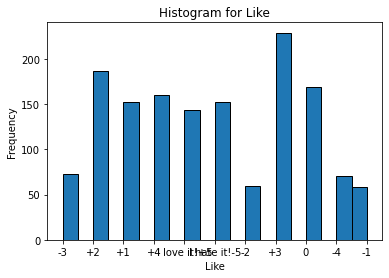

In [12]:
# Creating a histogram for Like
plt.hist(data['Like'], bins=20, edgecolor='k')
plt.title('Histogram for Like')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.show()

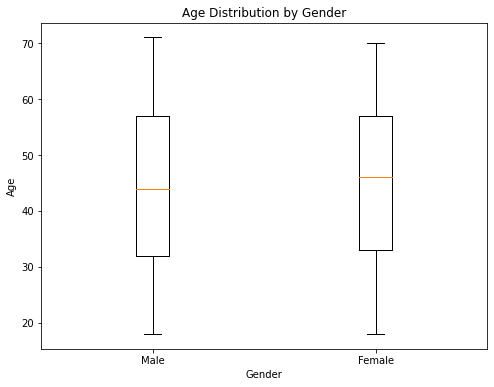

In [13]:
#  Box plot for Like by Gender
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['Gender'] == 'Male']['Age'], 
             data[data['Gender'] == 'Female']['Age']], 
            labels=['Male', 'Female'])
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


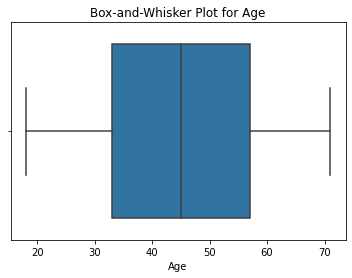

In [14]:
import seaborn as sns

# box-and-whisker plot for the 'Age' variable
sns.boxplot(x=data['Age'])
plt.title('Box-and-Whisker Plot for Age')
plt.xlabel('Age')
plt.show()


# Data preprocessing

# Merging Levels of Categorical Variables

In [15]:
#merge levels for the "convenient" column
data = pd.DataFrame({
    'convenient': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No']
})

# Map 'Yes' to 1 and 'No' to 0
data['ConvenientNumeric'] = data['convenient'].map({'Yes': 1, 'No': 0})

# Check the result
print(data)


  convenient  ConvenientNumeric
0        Yes                  1
1         No                  0
2         No                  0
3        Yes                  1
4        Yes                  1
5         No                  0


In [16]:
#merge levels for the "healthy" column
data = pd.DataFrame({
    'healthy': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No']
})
data['healthyNumeric'] = data['healthy'].map({'Yes': 1, 'No': 0})
print(data)

  healthy  healthyNumeric
0     Yes               1
1      No               0
2      No               0
3     Yes               1
4     Yes               1
5      No               0


# Principal component analysis

In [17]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mcdonalds.csv')

# Perform one-hot encoding for all categorical columns
data = pd.get_dummies(data)

# Convert any NaN values to 0 (if applicable)
data = data.fillna(0)

# Save the binary encoded dataset back to a CSV file
data.to_csv("binary_encoded_dataset.csv", index=False)


In [18]:
data.head()

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,fattening_Yes,greasy_No,...,Like_I hate it!-5,Like_I love it!+5,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Female,Gender_Male
0,61,1,0,0,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,51,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,62,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,69,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,49,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
data.columns

Index(['Age', 'yummy_No', 'yummy_Yes', 'convenient_No', 'convenient_Yes',
       'spicy_No', 'spicy_Yes', 'fattening_No', 'fattening_Yes', 'greasy_No',
       'greasy_Yes', 'fast_No', 'fast_Yes', 'cheap_No', 'cheap_Yes',
       'tasty_No', 'tasty_Yes', 'expensive_No', 'expensive_Yes', 'healthy_No',
       'healthy_Yes', 'disgusting_No', 'disgusting_Yes', 'Like_+1', 'Like_+2',
       'Like_+3', 'Like_+4', 'Like_-1', 'Like_-2', 'Like_-3', 'Like_-4',
       'Like_0', 'Like_I hate it!-5', 'Like_I love it!+5',
       'VisitFrequency_Every three months',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate binary-encoded categorical columns
categorical_columns = ['Age', 'yummy_No', 'yummy_Yes', 'convenient_No', 'convenient_Yes',
       'spicy_No', 'spicy_Yes', 'fattening_No', 'fattening_Yes', 'greasy_No',
       'greasy_Yes', 'fast_No', 'fast_Yes', 'cheap_No', 'cheap_Yes',
       'tasty_No', 'tasty_Yes', 'expensive_No', 'expensive_Yes', 'healthy_No',
       'healthy_Yes', 'disgusting_No', 'disgusting_Yes', 'Like_+1', 'Like_+2',
       'Like_+3', 'Like_+4', 'Like_-1', 'Like_-2', 'Like_-3', 'Like_-4',
       'Like_0', 'Like_I hate it!-5', 'Like_I love it!+5',
       'VisitFrequency_Every three months',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year', 'Gender_Female', 'Gender_Male']  # List all binary columns

categorical_data = data[categorical_columns]

# Standardize the numeric column(s) (Age in this case)
numeric_data = data['Age']
scaler = StandardScaler()
numeric_data = scaler.fit_transform(numeric_data.values.reshape(-1, 1))  # Reshape for one feature

# Perform PCA on standardized numeric data with one component
pca = PCA(n_components=1)  # Specify one component
numeric_pca = pca.fit_transform(numeric_data)

# Combine PCA-transformed numeric data with categorical data
combined_data = pd.concat([pd.DataFrame(numeric_pca, columns=['PCA1']), categorical_data], axis=1)

# Now 'combined_data' contains the PCA-transformed numeric data (with one component) and the binary-encoded categorical columns.


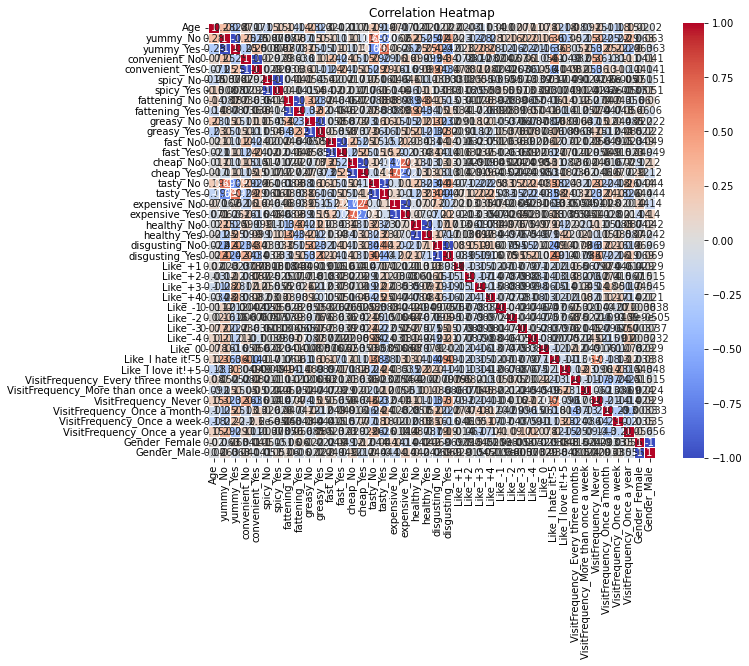

In [21]:
#  Create a correlation heatmap for numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



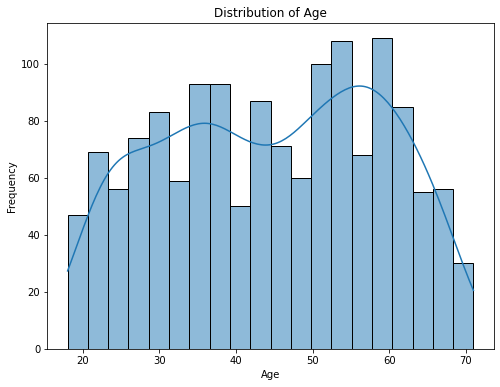

In [22]:
# Example: Create a histogram to visualize the distribution of a numeric variable
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

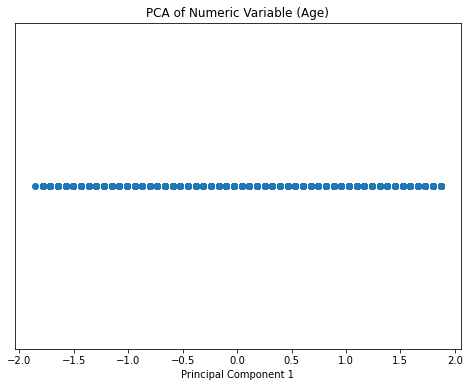

Explained Variance Ratio (PC1): 1.0


In [23]:
# Extract the numeric column 'Age'
numeric_column = 'Age'

# Standardize the numeric column
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[[numeric_column]])

# Perform PCA on the standardized numeric data with 1 component
pca = PCA(n_components=1)  # Specify 1 component
numeric_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the first principal component
plt.figure(figsize=(8, 6))
plt.scatter(numeric_pca, [0] * len(numeric_pca))  # Plot on a single axis (1D)
plt.title("PCA of Numeric Variable (Age)")
plt.xlabel("Principal Component 1")
plt.yticks([])  # Remove y-axis
plt.show()

# Print explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (PC1):", explained_variance_ratio[0])


# Extracting segments

In [24]:


# Assuming you have a DataFrame called 'data'
data['Segment'] = np.random.randint(1, 6, size=len(data))  # Creating a synthetic 'Segment' column with random values from 1 to 5

# Now, you can group the data by the synthetic 'Segment' column and calculate the mean for binary variables
segment_means = data.groupby('Segment').mean()

# Calculate the overall means for comparison
overall_means = data.mean()

# Display segment means and overall means
print("Segment Means:")
print(segment_means)

print("\nOverall Means:")
print(overall_means)



Segment Means:
               Age  yummy_No  yummy_Yes  convenient_No  convenient_Yes  \
Segment                                                                  
1        44.505535  0.472325   0.527675       0.062731        0.937269   
2        43.578947  0.442105   0.557895       0.115789        0.884211   
3        44.755853  0.464883   0.535117       0.123746        0.876254   
4        45.086093  0.427152   0.572848       0.072848        0.927152   
5        45.040541  0.432432   0.567568       0.084459        0.915541   

         spicy_No  spicy_Yes  fattening_No  fattening_Yes  greasy_No  ...  \
Segment                                                               ...   
1        0.911439   0.088561      0.114391       0.885609   0.442804  ...   
2        0.915789   0.084211      0.129825       0.870175   0.480702  ...   
3        0.923077   0.076923      0.160535       0.839465   0.474916  ...   
4        0.900662   0.099338      0.149007       0.850993   0.506623  ...   
5   

# Comparision and visualizations

In [25]:
# Comparison within segments
for segment_name, segment_data in segment_means.iterrows():
    print(f"Segment: {segment_name}")
    for variable, percentage in segment_data.iteritems():
        if percentage > overall_means[variable]:
            print(f"- {variable}: Above Average ({percentage:.2%})")
        elif percentage < overall_means[variable]:
            print(f"- {variable}: Below Average ({percentage:.2%})")
        else:
            print(f"- {variable}: Average ({percentage:.2%})")
    print()



Segment: 1
- Age: Below Average (4450.55%)
- yummy_No: Above Average (47.23%)
- yummy_Yes: Below Average (52.77%)
- convenient_No: Below Average (6.27%)
- convenient_Yes: Above Average (93.73%)
- spicy_No: Above Average (91.14%)
- spicy_Yes: Below Average (8.86%)
- fattening_No: Below Average (11.44%)
- fattening_Yes: Above Average (88.56%)
- greasy_No: Below Average (44.28%)
- greasy_Yes: Above Average (55.72%)
- fast_No: Above Average (11.07%)
- fast_Yes: Below Average (88.93%)
- cheap_No: Below Average (38.38%)
- cheap_Yes: Above Average (61.62%)
- tasty_No: Below Average (35.06%)
- tasty_Yes: Above Average (64.94%)
- expensive_No: Above Average (66.79%)
- expensive_Yes: Below Average (33.21%)
- healthy_No: Below Average (79.34%)
- healthy_Yes: Above Average (20.66%)
- disgusting_No: Below Average (74.54%)
- disgusting_Yes: Above Average (25.46%)
- Like_+1: Above Average (12.18%)
- Like_+2: Below Average (12.55%)
- Like_+3: Below Average (14.39%)
- Like_+4: Above Average (11.81%)
- 

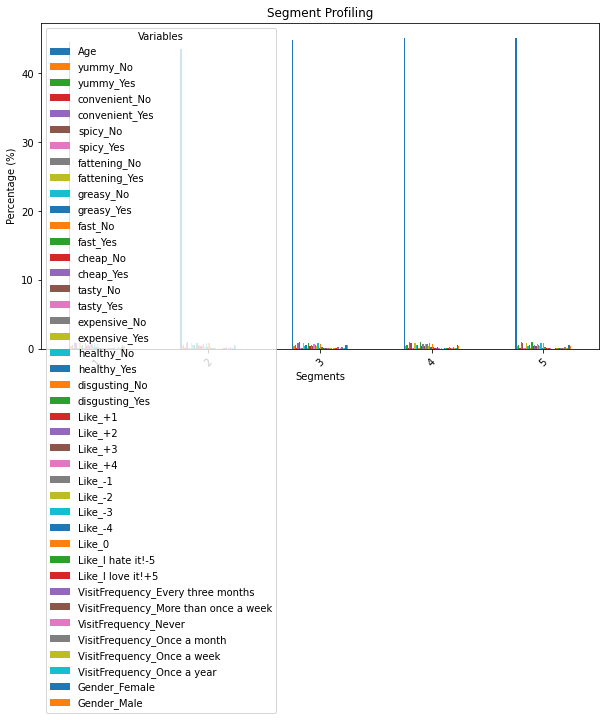

In [26]:
# Comparison between segments 
segment_means.plot(kind='bar', figsize=(10, 6))
plt.title('Segment Profiling')
plt.ylabel('Percentage (%)')
plt.xlabel('Segments')
plt.xticks(rotation=45)
plt.legend(title='Variables', loc='upper left')
plt.show()



In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have a DataFrame named df with your data
# Select the columns you want to use for clustering (first 11 columns)
selected_columns = data.iloc[:, :11]

# Convert the selected columns to a NumPy array
data_array = selected_columns.values

# Standardize the data (optional but often recommended for k-means)
scaler = StandardScaler()
data_array_scaled = scaler.fit_transform(data_array)

# Perform k-means clustering with a specified number of clusters (e.g., 4 clusters)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=1234, n_init=10)
kmeans.fit(data_array_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Assign cluster labels back to the DataFrame
data['Cluster'] = cluster_labels

# Now, your DataFrame 'df' contains a 'Cluster' column indicating the cluster assignment for each data point

# Cluster profiling

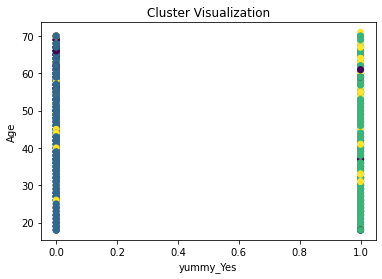

Silhouette Score: 0.3914072460823913


In [33]:


# Cluster Profiling
cluster_profiles = data.groupby('Cluster').mean()

# Visualization
# Creating a scatter plot of two features (Feature1 and Feature2) to visualize clusters
plt.scatter(data['yummy_Yes'], data['Age'], c=data['Cluster'], cmap='viridis')
plt.xlabel('yummy_Yes')
plt.ylabel('Age')
plt.title('Cluster Visualization')
plt.show()

# Interpretation

cluster_labels = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'
}
data['Cluster_Labels'] = data['Cluster'].map(cluster_labels)

from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(data_array_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


